# Official Website -> [quick_ml](https://antoreepjana.wixsite.com/quick-ml)

Link to quick_ml documentation -> https://gitlab.com/antoreep_jana/quick_ml/-/blob/master/README.md

### Installing quick_ml

In [1]:
!pip install quick-ml

     |████████████████████████████████| 43 kB 188 kB/s 
     |████████████████████████████████| 394.7 MB 13 kB/s 
  Created wheel for quick-ml: filename=quick_ml-1.3.4-py3-none-any.whl size=29968 sha256=474ff4031a5d3c4b1512f06af61fc5c7cad77b3b8a6db9bb16ff8fb3ff980fde
  Stored in directory: /root/.cache/pip/wheels/06/c0/b6/d6a303d5f0a5593a791952e016f838b57e839de6248a11b22e
Successfully built quick-ml
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.4.1
    Uninstalling tensorflow-2.4.1:
      Successfully uninstalled tensorflow-2.4.1


## Necessary Imports

Please maintain the order of imports, i.e., tensorflow then quick_ml

In [2]:
import tensorflow as tf

In [3]:
import quick_ml

Tensorflow imported successfully. Tensorflow version -> 2.4.0


### Obtain the Dataset (Cats & Dogs Dataset)

Obtaining the cats & dogs dataset. Naming the downloaded file as catsdogs.zip

In [4]:
! wget https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip -O catsdogs.zip

--2021-02-21 11:41:22--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_3367a.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.212.148.130, 2600:1408:8400:3a9::e59, 2600:1408:8400:385::e59
Connecting to download.microsoft.com (download.microsoft.com)|23.212.148.130|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824894548 (787M) [application/octet-stream]
Saving to: ‘catsdogs.zip’

catsdogs.zip        100%[===================>] 786.68M  32.4MB/s    in 26s     

2021-02-21 11:41:49 (30.3 MB/s) - ‘catsdogs.zip’ saved [824894548/824894548]



unzip the contents of the zip file to obtain the dataset directory folder.

In [5]:
!unzip /kaggle/working/catsdogs.zip

Archive:  /kaggle/working/catsdogs.zip
   creating: PetImages/Cat/
  inflating: PetImages/Cat/0.jpg     
  inflating: PetImages/Cat/1.jpg     
  inflating: PetImages/Cat/10.jpg    
  inflating: PetImages/Cat/100.jpg   
  inflating: PetImages/Cat/1000.jpg  
  inflating: PetImages/Cat/10000.jpg  
  inflating: PetImages/Cat/10001.jpg  
  inflating: PetImages/Cat/10002.jpg  
  inflating: PetImages/Cat/10003.jpg  
  inflating: PetImages/Cat/10004.jpg  
  inflating: PetImages/Cat/10005.jpg  
  inflating: PetImages/Cat/10006.jpg  
  inflating: PetImages/Cat/10007.jpg  
  inflating: PetImages/Cat/10008.jpg  
  inflating: PetImages/Cat/10009.jpg  
  inflating: PetImages/Cat/1001.jpg  
  inflating: PetImages/Cat/10010.jpg  
  inflating: PetImages/Cat/10011.jpg  
  inflating: PetImages/Cat/10012.jpg  
  inflating: PetImages/Cat/10013.jpg  
  inflating: PetImages/Cat/10014.jpg  
  inflating: PetImages/Cat/10015.jpg  
  inflating: PetImages/Cat/10016.jpg  
  inflating: PetImages/Cat/10017.jpg  
  i

Remove the zip file.

In [6]:
!rm catsdogs.zip

We have finally obtained the Labeled Dataset.

## Create Labeled TFRecords Dataset

### Convert entire Labeled Data to TfRecords Dataset

In [7]:
from quick_ml.tfrecords_maker import create_tfrecord_labeled

In [8]:
from quick_ml.tfrecords_maker import get_addrs_labels

In [9]:
DATA_DIR = '/kaggle/working/PetImages'

In [10]:
addrs, labels = get_addrs_labels(DATA_DIR)

Class Encodings for the Dataset Folder is as follows -> 

 {'Cat': 0, 'Dog': 1}


In [11]:
output_filename = 'train.tfrecords'
create_tfrecord_labeled(addrs, labels, output_filename, IMAGE_SIZE = (192,192))


		Ensure that the data directory has the following structure ->

		/data|
			 |
			 |-> class1
			 |-> class2
			 |-> class3
			 |-> class4
			 .
			 .
			 .
			 |-> classN

		the input to data_dir must the path to /data folder. & Make sure that the images are in .jpg format
		
Beginning to write data to train.tfrecords


Data written -> 0/25000
Data written -> 300/25000
Data written -> 600/25000
Data written -> 900/25000
Data written -> 1200/25000
Data written -> 1500/25000
Data written -> 1800/25000
Data written -> 2100/25000
Data written -> 2400/25000
Data written -> 2700/25000
Data written -> 3000/25000
Data written -> 3300/25000
Data written -> 3600/25000
Data written -> 3900/25000
Data written -> 4200/25000
Data written -> 4500/25000
Data written -> 4800/25000
Data written -> 5100/25000
Data written -> 5400/25000
Data written -> 5700/25000
Data written -> 6000/25000
Data written -> 6300/25000
Data written -> 6600/25000
Data written -> 6900/25000
Data written -> 7200/25000
Data w

After tfrecords are successfully made, you will receive the Labeled TFRecord Format. <br>

Save the Labeled TFRecord Format somewhere like in the cell below as a markdown text. eg. <br>

{
			'image' : tf.io.FixedLenFeature([], tf.string),
			'label' : tf.io.FixedLenFeature([], tf.int64)
			}

This will be asked while reading of the tfrecords dataset. Make sure you don't lose it else you'll have to repeat the process of tfrecords dataset creation and save the Format.

#### Split the Labeled Data

Split the dataset in a certain defined ratio. <br>

In [12]:
from quick_ml.tfrecords_maker import create_split_tfrecords_data

Not running this code cell on kaggle kernel as the disk space isn't sufficient to support. You can use Google Colab Notebooks for Dataset creation. Obtain the datasets from Google Colab by downloading. Upload the TFRecords Dataset on Kaggle as Public Dataset. Use them as input in Kaggle Kernels.

In [13]:
outfile1name = 'training.tfrecords'
outfile2name = 'validation.tfrecords'

#create_split_tfrecords_data(DATA_DIR, outfile1name, outfile2name, split_size_ratio = 0.7, IMAGE_SIZE = (192,192))

## Create Unlabeled TFRecords Dataset

In [14]:
from quick_ml.tfrecords_maker import create_tfrecord_unlabeled
from quick_ml.tfrecords_maker import get_addrs_ids

In [15]:
Unlabeled_Data_Dir = '/kaggle/working/PetImages/Cat'
addrs, ids = get_addrs_ids(Unlabeled_Data_Dir)

In [16]:
out_filename = 'unlabeled.tfrecords'
create_tfrecord_unlabeled(out_filename, addrs, ids, IMAGE_SIZE = (192,192))


		The Data for this should be unlabeled. 

		The folder structure should be

		data |
			 |
			 |->filename1.jpg
			 |->filename2.jpg
			 |->filename3.jpg
			 |->filename4.jpg
			 |.
			 ..
			 ..
			 |->filenameN.jpg


		
Beginning to write the unlabeled.tfrecords


Data Written -> 0/12500
Data Written -> 300/12500
Data Written -> 600/12500
Data Written -> 900/12500
Data Written -> 1200/12500
Data Written -> 1500/12500
Data Written -> 1800/12500
Data Written -> 2100/12500
Data Written -> 2400/12500
Data Written -> 2700/12500
Data Written -> 3000/12500
Data Written -> 3300/12500
Data Written -> 3600/12500
Data Written -> 3900/12500
Data Written -> 4200/12500
Data Written -> 4500/12500
Data Written -> 4800/12500
Data Written -> 5100/12500
Data Written -> 5400/12500
Data Written -> 5700/12500
Data Written -> 6000/12500
Data Written -> 6300/12500
Data Written -> 6600/12500
Data Written -> 6900/12500
Data Written -> 7200/12500
Data Written -> 7500/12500
Data Written -> 7800/12500
Data Wri

Obtain the unlabeled TFRecords Format from the output. As above, save the unlabeled data format in a markdown or anywhere where you can reference it at a later stage. <br>
**Unlabeled Data Format** -> <br>
{
			'image' : tf.io.FixedLenFeature([], tf.string),
			'idnum' : tf.io.FixedLenFeature([], tf.string)
			}

### You can use Google Colab Notebooks for Dataset creation. Obtain the datasets from Google Colab by downloading. Upload the TFRecords Dataset on Kaggle as Public Dataset. Use them as input in Kaggle Kernels.

## Visualizing the Dataset (TFRecords)

#### Labeled TFRecords Data File

##### Check any one image and its corresponding label

In [17]:
from quick_ml.visualize_and_check_data import check_one_image_and_label

For reading the Dataset (Labeled or Unlabeled), you need to have the TFRecords Format of the Dataset. <br>
<br>
For reading labeled TFRecords Dataset, use **get_labeled_tfrecord_format** function present at **begin_tpu** module of **quick_ml** package. <br>
For labeled TFRecords File, you need two variables. <br>
1. dictionary_labeled <br>
2. IMAGE_SIZE <br>

"dictionary_labeled" should be assigned the dictionary of Labeled TFRecord Data which we can obtain by scrolling above by referencing to the location where we saved the format. <br>
IMAGE_SIZE should be assigned the Image dimensions in the form of string. The Format should be "dim1,dim2". <br>
Any deviation for the variable names or their format of value assignment, it will lead to errors while calling get_labeled_tfrecord_format(). <br>
Follow the code cell below to know more.

In [18]:
from quick_ml.begin_tpu import get_labeled_tfrecord_format

dictionary_labeled = "{ 'image' : tf.io.FixedLenFeature([], tf.string), 'label' : tf.io.FixedLenFeature([], tf.int64) }"
IMAGE_SIZE = "192,192"

get_labeled_tfrecord_format(dictionary_labeled, IMAGE_SIZE)

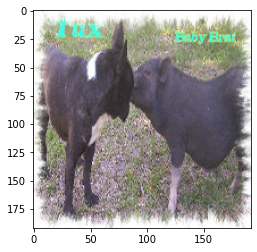

Label of the Image ->  1


In [19]:
tfrecord_filename = '/kaggle/working/train.tfrecords'


check_one_image_and_label(tfrecord_filename)

##### Check a batch of images along with their labels in a grid

In [20]:
from quick_ml.visualize_and_check_data import check_batch_and_labels

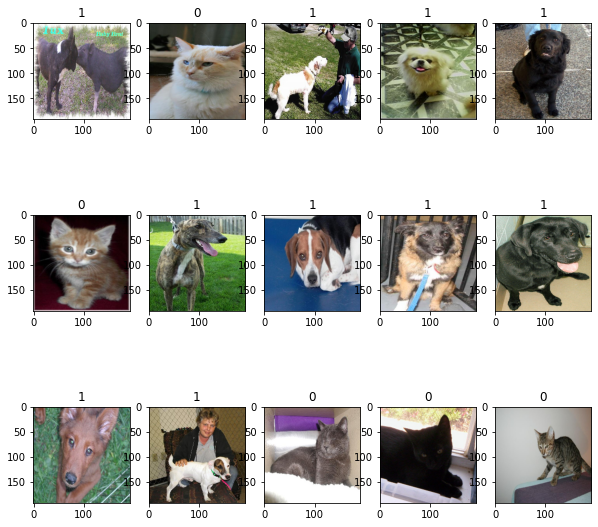

In [21]:
tfrecord_filename = '/kaggle/working/train.tfrecords'
n_examples = 15
grid_rows = 3
grid_columns = 5
grid_size = (10,10)


check_batch_and_labels(tfrecord_filename, n_examples, grid_rows, grid_columns, grid_size)

#### Unlabeled TFRecords Data File

##### Check one image and its idnum

In [22]:
from quick_ml.visualize_and_check_data import check_one_image_and_id

For reading the Dataset (Labeled or Unlabeled), you need to have the TFRecords Format of the Dataset. <br>
<br>
For reading unlabeled TFRecords Dataset, use **get_unlabeled_tfrecord_format** function present at **begin_tpu** module of **quick_ml** package. <br>
For labeled TFRecords File, you need two variables. <br>
1. dictionary_unlabeled <br>
2. IMAGE_SIZE <br>

"dictionary_unlabeled" should be assigned the dictionary of Unlabeled TFRecord Data which we can obtain by scrolling above by referencing to the location where we saved the format. <br>
IMAGE_SIZE should be assigned the Image dimensions in the form of string. The Format should be "dim1,dim2". <br>
Any deviation for the variable names or their format of value assignment, it will lead to errors while calling get_unlabeled_tfrecord_format(). <br>
Follow the code cell below to know more.

In [23]:
from quick_ml.begin_tpu import get_unlabeled_tfrecord_format

dictionary_unlabeled = "{ 'image' : tf.io.FixedLenFeature([], tf.string), 'idnum' : tf.io.FixedLenFeature([], tf.string) }"
IMAGE_SIZE = "192,192"

get_unlabeled_tfrecord_format(dictionary_unlabeled, IMAGE_SIZE)

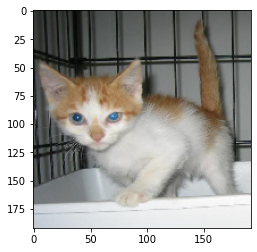

Id of this image is ->  3819.jpg


In [24]:
tfrecord_filename = '/kaggle/working/unlabeled.tfrecords'


check_one_image_and_id(tfrecord_filename)

##### Check a batch of images and their idnums

In [25]:
from quick_ml.visualize_and_check_data import check_batch_and_ids

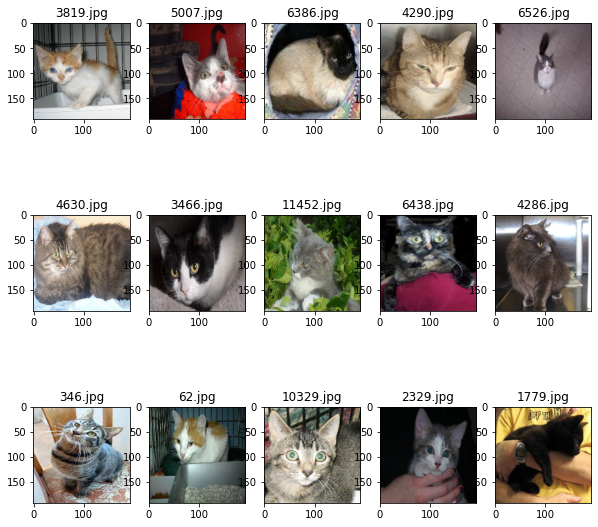

In [26]:
tfrecord_filename = '/kaggle/working/unlabeled.tfrecords'
n_examples = 15
grid_rows = 3
grid_columns = 5
grid_size = (10,10)


check_batch_and_ids(tfrecord_filename, n_examples, grid_rows, grid_columns, grid_size)